# Jamur Beracun

## MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
import warnings
warnings.filterwarnings('ignore')

- classes: e = edible, p = poisonous
- cap-shape: b = bell, c = conical, x = convex, f = flat, k = knobbed, s = sunken
- cap-surface: f = fibrous,g = grooves, y = scaly, s = smooth
- cap-color: n = brown, b = buff, c = cinnamon, g = gray, r = green, p = pink, u = purple, e = red, w = white,y = yellow
- bruises: t = bruises, f = no
- odor: a = almond, l = anise, c = creosote, y = fishy, f = foul, m = musty, n = none, p = pungent, s = spicy
- gill-attachment: a = attached, d = descending, f = free, n = notched
- gill-spacing: c = close, w = crowded, d = distant
- gill-size: b = broad, n = narrow
- gill-color: k = black, n = brown, b = buff, h = chocolate, g = gray, r = green, o = orange, p = pink, u = purple, e = red, - w = white, y = yellow
- stalk-shape: e = enlarging, t = tapering
- stalk-root: b = bulbous, c = club, u = cup, e = equal, z = rhizomorphs, r = rooted, ? = missing
- stalk-surface-above-ring: f = fibrous, y = scaly, k = silky, s = smooth
- stalk-surface-below-ring: f = fibrous, y = scaly, k = silky, s = smooth
- stalk-color-above-ring: n = brown, b = buff, c = cinnamon, g = gray, o = orange, p = pink, e = red, w = white, y = yellow
- stalk-color-below-ring: n = brown, b = buff, c = cinnamon, g = gray, o = orange, p = pink, e = red, w = white, y = yellow
- veil-type: p = partial, u = universal
- veil-color: n = brown, o = orange, w = white, y = yellow
- ring-number: n = none, o = one, t = two
- ring-type: c = cobwebby, e = evanescent, f = flaring, l = large, n = none, p = pendant s = sheathing, z = zone
- spore-print-color: k = black, n = brown, b = buff, h = chocolate, r = green, o = orange, u = purple, w = white, y = yellow
- population: a = abundant, c = clustered, n = numerous, s = scattered, v = several, y = solitary
- habitat: g = grasses, l = leaves, m = meadows, p = paths, u = urban, w = waste, d = woods

In [ ]:
# load datasets

df = pd.read_csv('mushrooms.csv')
df.head(3)

In [ ]:
for i in df.columns:
    label = LabelEncoder()
    label.fit(df[i])
    df['label_'+i] = label.transform(df[i])
df

In [4]:
# label untuk class ( 0 = edible, 1 = poisonous)
df['label_class']

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: label_class, Length: 8124, dtype: int32

In [5]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat',
       'label_class', 'label_cap-shape', 'label_cap-surface',
       'label_cap-color', 'label_bruises', 'label_odor',
       'label_gill-attachment', 'label_gill-spacing', 'label_gill-size',
       'label_gill-color', 'label_stalk-shape', 'label_stalk-root',
       'label_stalk-surface-above-ring', 'label_stalk-surface-below-ring',
       'label_stalk-color-above-ring', 'label_stalk-color-below-ring',
       'label_veil-type', 'label_veil-color', 'label_ring-number',
       'label_ring-type', 'label_spore-print-color', 'label_population',
     

In [6]:
# mempersingkat column list 

a = df[['label_cap-shape', 'label_cap-surface',
       'label_cap-color', 'label_bruises', 'label_odor',
       'label_gill-attachment', 'label_gill-spacing', 'label_gill-size',
       'label_gill-color', 'label_stalk-shape', 'label_stalk-root',
       'label_stalk-surface-above-ring', 'label_stalk-surface-below-ring',
       'label_stalk-color-above-ring', 'label_stalk-color-below-ring',
       'label_veil-type', 'label_veil-color', 'label_ring-number',
       'label_ring-type', 'label_spore-print-color', 'label_population',
       'label_habitat']]

In [7]:
xtr, xts, ytr, yts = train_test_split(a, df['label_class'], test_size=.2)
print(len(xtr), len(xts))

6499 1625


In [8]:
# check cross validation score

cv_score = cross_val_score(
    LogisticRegression(),
    xtr,
    ytr,
    cv = 6
)
np.mean(cv_score)

0.9486083711252625

In [9]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [10, 100, 1000, 10000]

param = {'penalty':penalty, 'solver':solver, 'max_iter':max_iter}

In [10]:
# check parameter dengan hyperparameter tuning RandomSearchCV
modelTest = LogisticRegression()

modelrs = RandomizedSearchCV(
    estimator = modelTest,
    param_distributions = param,
    cv = 5
)
modelrs.fit(xtr, ytr)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'max_iter': [10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'l

In [11]:
modelrs.best_params_

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 10000}

In [12]:
model = LogisticRegression(solver= 'saga', penalty= 'l1', max_iter= 10000)
model.fit(xtr,ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
df['prediksi'] = model.predict(a)

In [14]:
# check yang tidak sama

df[df['label_class'] != df['prediksi']]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,label_stalk-color-above-ring,label_stalk-color-below-ring,label_veil-type,label_veil-color,label_ring-number,label_ring-type,label_spore-print-color,label_population,label_habitat,prediksi
15,e,s,f,g,f,n,f,c,n,k,...,7,7,0,2,1,4,3,5,5,1
28,e,f,f,n,f,n,f,c,n,k,...,7,7,0,2,1,4,2,5,5,1
29,e,x,s,y,t,a,f,w,n,n,...,7,7,0,2,1,4,3,4,0,1
36,e,s,f,g,f,n,f,c,n,k,...,7,7,0,2,1,4,2,4,5,1
42,e,x,f,n,f,n,f,c,n,g,...,7,7,0,2,1,4,2,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7401,p,c,y,y,f,n,f,w,n,y,...,8,8,0,3,1,0,7,1,2,0
7483,p,f,y,y,f,n,f,w,n,y,...,8,8,0,3,1,0,7,1,2,0
7600,p,b,y,y,f,n,f,w,n,w,...,8,8,0,3,1,0,7,1,2,0
7706,p,c,y,y,f,n,f,w,n,w,...,8,8,0,3,1,0,7,1,2,0


In [15]:
y_pred = model.predict(xts)

In [16]:
# Calculate the accuracy of model
accuracy=accuracy_score(y_true=yts, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 95.82%


In [17]:
print(classification_report(yts, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       838
           1       0.96      0.96      0.96       787

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



## ROC AUC

In [18]:
# buat dataframe baru khusus ROC dan AUC

dfROC = pd.DataFrame()
dfROC['label_class'] = df['label_class'].copy()

In [19]:
dfROC['proba'] = model.predict_proba(a)[:, 1]
dfROC

,label_class,proba
0,1,9.176680e-01
1,0,2.381305e-01
2,0,2.429435e-02
3,1,9.053844e-01
4,0,6.687071e-16
...,...,...
8119,0,2.804350e-06
8120,0,4.445303e-18
8121,0,8.110989e-06
8122,1,9.040467e-01


In [20]:
for i in range(1,10):
    dfROC[f'y"{i/10}'] = dfROC['proba'].apply(lambda x: 1 if (x > i/10) else 0)
dfROC

,label_class,proba,"y""0.1","y""0.2","y""0.3","y""0.4","y""0.5","y""0.6","y""0.7","y""0.8","y""0.9"
0,1,9.176680e-01,1,1,1,1,1,1,1,1,1
1,0,2.381305e-01,1,1,0,0,0,0,0,0,0
2,0,2.429435e-02,0,0,0,0,0,0,0,0,0
3,1,9.053844e-01,1,1,1,1,1,1,1,1,1
4,0,6.687071e-16,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2.804350e-06,0,0,0,0,0,0,0,0,0
8120,0,4.445303e-18,0,0,0,0,0,0,0,0,0
8121,0,8.110989e-06,0,0,0,0,0,0,0,0,0
8122,1,9.040467e-01,1,1,1,1,1,1,1,1,1


In [21]:
# confusion matrix y & y"0.1
tn, fp, fn, tp = confusion_matrix(dfROC['label_class'], dfROC['y"0.1']).reshape(-1,)
tn, fp, fn, tp

(3495, 713, 7, 3909)

In [22]:
fpr = fp / (fp+tn)
tpr = tp/ (tp+fn)
fpr , tpr

(0.16943916349809887, 0.9982124616956077)

In [23]:
# FP Rate & TP Rate untuk y & y"0.1 - y"0.9

roc = []
for i in range(1, 10):
    tn, fp, fn, tp = confusion_matrix(dfROC['label_class'], dfROC[f'y"{i/10}']).reshape(-1,)
    fpr = fp / (fp+tn)
    tpr = tp/ (tp+fn)
    roc.append([fpr, tpr])
roc = np.array(roc)
roc

array([[0.16943916, 0.99821246],
       [0.08935361, 0.98901941],
       [0.06677757, 0.98059244],
       [0.05204373, 0.97037794],
       [0.04039924, 0.95684372],
       [0.03184411, 0.93692543],
       [0.02352662, 0.90960163],
       [0.01639734, 0.87563841],
       [0.01140684, 0.80541369]])

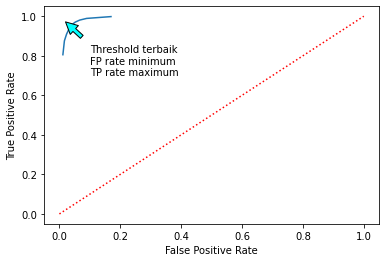

In [24]:
# plot ROC curve
plt.plot(roc[:,0], roc[:,1])
plt.plot([0,1], [0,1], 'r:')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.annotate('Threshold terbaik\nFP rate minimum\nTP rate maximum', xy=(0, 1), xytext=(.1, .7),
            arrowprops=dict(facecolor='cyan',shrink=.2))
plt.show()

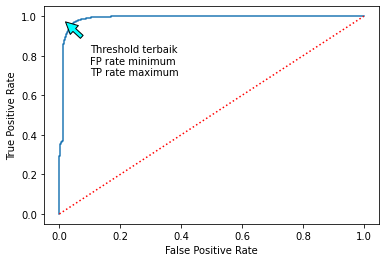

In [25]:
# plot ROC Curve

fpr, tpr, thres = roc_curve(dfROC['label_class'], model.predict_proba(a)[:,1])

plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], 'r:')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.annotate('Threshold terbaik\nFP rate minimum\nTP rate maximum', xy=(0, 1), xytext=(.1, .7),
            arrowprops=dict(facecolor='cyan',shrink=.2))
plt.show()

In [26]:
fpr, tpr, thres

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.75285171e-04,
        4.75285171e-04, 7.12927757e-04, 7.12927757e-04, 9.50570342e-04,
        9.50570342e-04, 1.18821293e-03, 1.18821293e-03, 1.42585551e-03,
        1.42585551e-03, 1.66349810e-03, 1.66349810e-03, 1.90114068e-03,
        1.90114068e-03, 2.13878327e-03, 2.13878327e-03, 2.37642586e-03,
        2.37642586e-03, 2.61406844e-03, 2.61406844e-03, 2.85171103e-03,
        2.85171103e-03, 3.08935361e-03, 3.08935361e-03, 3.32699620e-03,
        3.32699620e-03, 3.56463878e-03, 3.56463878e-03, 3.80228137e-03,
        3.80228137e-03, 4.03992395e-03, 4.03992395e-03, 4.27756654e-03,
        4.27756654e-03, 4.51520913e-03, 4.51520913e-03, 4.75285171e-03,
        4.75285171e-03, 4.99049430e-03, 4.99049430e-03, 5.22813688e-03,
        5.22813688e-03, 5.94106464e-03, 5.94106464e-03, 6.17870722e-03,
        6.17870722e-03, 6.41634981e-03, 6.41634981e-03, 6.65399240e-03,
        6.65399240e-03, 7.12927757e-03, 7.12927757e-03, 7.366920

In [27]:
# Luas AUC
print('Score ROC AUC = ',roc_auc_score(dfROC['label_class'], model.predict(a))*100,'%')

Score ROC AUC =  95.82222392679735 %
